# Dijkstra's Shortest Path First

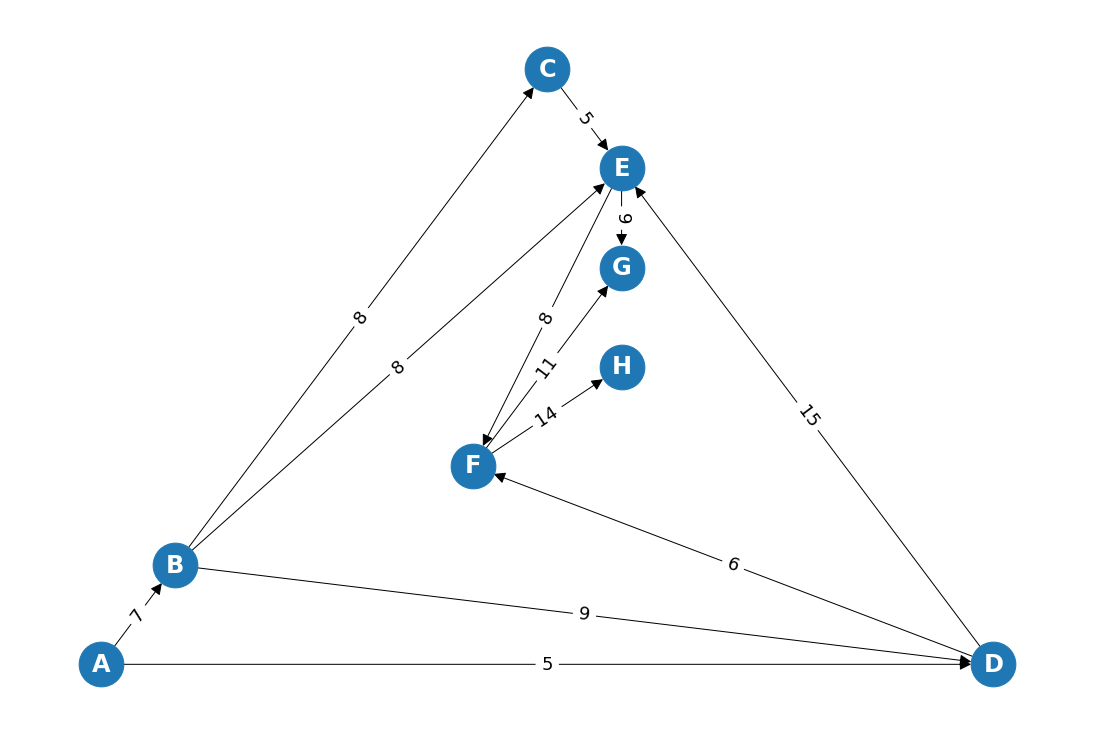

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

graph = {
    'A': [('B', 7), ('D', 5)],
    'B': [('C', 8), ('D', 9), ('E', 8)],
    'C': [('E', 5)],
    'D': [('E', 15), ('F', 6)],
    'E': [('F', 8), ('G', 9)],
    'F': [('G', 11), ('H', 14)]
}

G = nx.DiGraph()

for u, edges in graph.items():
    for v, weight in edges:
        G.add_edge(u, v, weight=weight)

pos = nx.planar_layout(G)
labels = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(15,10))    
nx.draw(G, pos=pos, with_labels=True, node_size=2000, font_size=24,
           font_color='white', font_weight='bold', arrows=True, arrowsize=24)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=18)
plt.draw()

In [25]:
from heapq import heappush, heappop


def dijkstra(graph, start):
    dists = {start: 0}
    paths = {start: [start]}
    q = [(0, start)]
    
    while q:
        cost, u = heappop(q)
        
        for v, weight in graph.get(u, []):
            if (alt := weight + cost) < dists.get(v, float('inf')):
                dists[v] = alt
                paths[v] = paths.get(u, []) + [v]

                heappush(q, (alt, v))

    return dists, paths

In [26]:
dijkstra(graph, 'A')

({'A': 0, 'B': 7, 'D': 5, 'E': 15, 'F': 11, 'C': 15, 'G': 22, 'H': 25},
 {'A': ['A'],
  'B': ['A', 'B'],
  'D': ['A', 'D'],
  'E': ['A', 'B', 'E'],
  'F': ['A', 'D', 'F'],
  'C': ['A', 'B', 'C'],
  'G': ['A', 'D', 'F', 'G'],
  'H': ['A', 'D', 'F', 'H']})

In [22]:
assert dijkstra(graph, 'C') == nx.single_source_dijkstra(G, 'C')